In [1]:
import csv
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
df=pd.read_csv('creditcard.csv')
print(df.shape)
print(df.columns)


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
print("Time:\n")
print(df['Time'].describe())

Time:

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [4]:
print("Amount:\n")
print(df['Amount'].describe())

Amount:

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [5]:
print("Class:\n")
print(df['Class'].describe())
print(df['Class'].value_counts())

Class:

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64
Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [7]:
## graph construction
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx


In [8]:
fraud_data=df[df['Class']==1]
normal_data=df[df['Class']==0].sample(n=len(fraud_data)*10,random_state=42)
print(fraud_data.shape)
print(normal_data.shape)
selected_df=pd.concat([normal_data,fraud_data])
features=selected_df.drop("Class",axis=1)
cos_sim=cosine_similarity(features)
np.save("cos_sim.npy",cos_sim)
print("Cosine similarity calculation completed and saved.")


(492, 31)
(4920, 31)


Cosine similarity calculation completed and saved.


In [10]:
features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [9]:
cos_sim=np.load("cos_sim.npy")
print(cos_sim)
print(cos_sim.shape)

[[1.         0.99999999 0.99999996 ... 0.9999999  0.99999897 0.99999997]
 [0.99999999 1.         0.99999998 ... 0.99999993 0.99999907 0.99999998]
 [0.99999996 0.99999998 1.         ... 0.99999998 0.99999931 0.99999999]
 ...
 [0.9999999  0.99999993 0.99999998 ... 1.         0.99999952 0.99999998]
 [0.99999897 0.99999907 0.99999931 ... 0.99999952 1.         0.99999929]
 [0.99999997 0.99999998 0.99999999 ... 0.99999998 0.99999929 1.        ]]
(5412, 5412)


In [18]:
# 計算每一列的統計量
max_values = np.max(cos_sim, axis=1)
min_values = np.min(cos_sim, axis=1)
median_values = np.median(cos_sim, axis=1)
mean_values = np.mean(cos_sim, axis=1)
std_values = np.std(cos_sim, axis=1)

# 對這些統計量再次計算統計量
stats_max = np.max(max_values)
stats_min = np.min(min_values)
stats_median = np.median(median_values)
stats_mean = np.mean(mean_values)
stats_std = np.std(std_values)

# 印出結果
print("Statistics of row statistics:")
print("  Max:", stats_max)
print("  Min:", stats_min)
print("  Median:", stats_median)
print("  Mean:", stats_mean)
print("  Std:", stats_std)

Statistics of row statistics:
  Max: 1.0000000000000013
  Min: 0.4802533462696412
  Median: 0.9999999443701095
  Mean: 0.9994750952999104
  Std: 0.00018216781841307606


In [24]:
G=nx.Graph()
for i in tqdm(range(cos_sim.shape[0]),desc="Graph Construction..."):
    for j in range(i+1,cos_sim.shape[1]):
        if cos_sim[i,j]>stats_median:
            G.add_edge(i,j)
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())
density=2*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(density)

Graph Construction...: 100%|██████████| 5412/5412 [00:06<00:00, 828.91it/s] 

Number of nodes: 5204
Number of edges: 4881305
0.3605577430273996


C:\Users\aeiou\AppData\Local\Temp\ipykernel_25960\772274815.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset_nodes=random.sample(G.nodes(),k=10)


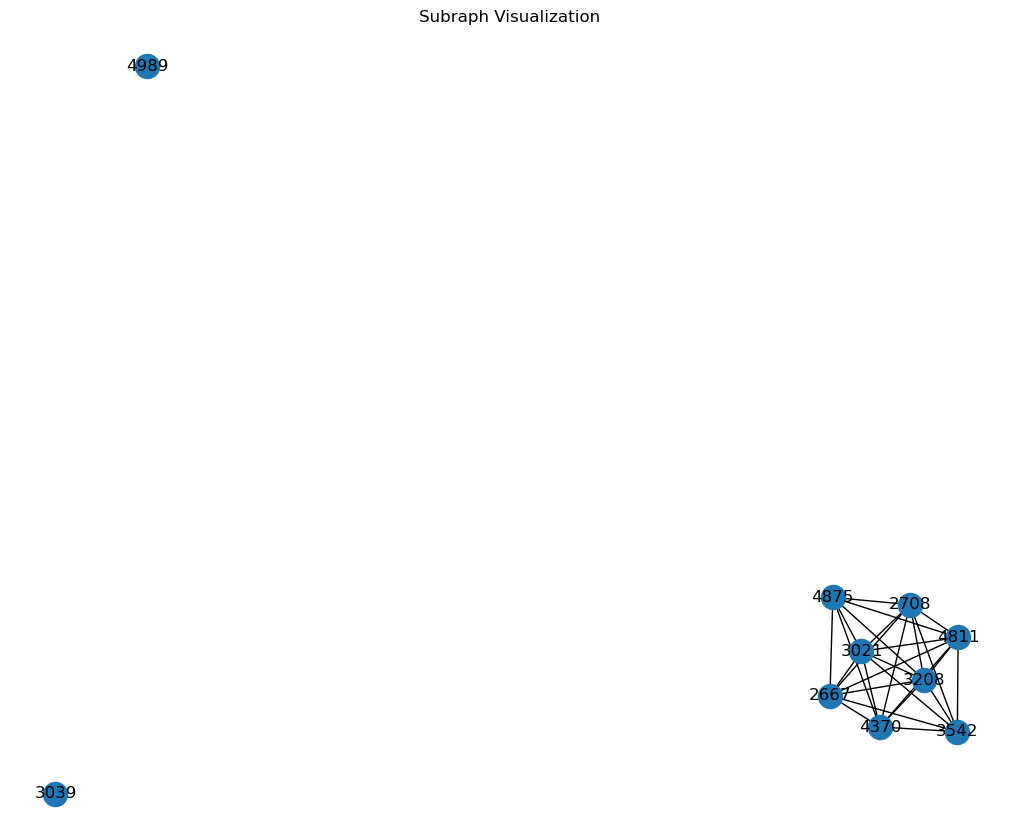

In [32]:
import matplotlib.pyplot as plt
import random
subset_nodes=random.sample(G.nodes(),k=10)
subgraph=G.subgraph(subset_nodes)
plt.figure(figsize=(10,8))
nx.draw(subgraph,with_labels=True)
plt.title("Subraph Visualization")
plt.show()

In [52]:
from collections import Counter
# 使用 nx.degree() 函數計算每個節點的度
node_degrees = dict(nx.degree(G))

# 使用 Counter 類對節點的度進行統計
degree_counts = Counter(node_degrees.values())

# 印出結果
print("Degree statistics:")
for degree, count in sorted(degree_counts.items()):
    print("Degree:", degree, "Count:", count)

Degree statistics:
Degree: 1 Count: 47
Degree: 2 Count: 34
Degree: 3 Count: 23
Degree: 4 Count: 14
Degree: 5 Count: 24
Degree: 6 Count: 16
Degree: 7 Count: 10
Degree: 8 Count: 18
Degree: 9 Count: 14
Degree: 10 Count: 20
Degree: 11 Count: 20
Degree: 12 Count: 10
Degree: 13 Count: 13
Degree: 14 Count: 17
Degree: 15 Count: 7
Degree: 16 Count: 6
Degree: 17 Count: 6
Degree: 18 Count: 7
Degree: 19 Count: 7
Degree: 20 Count: 4
Degree: 21 Count: 6
Degree: 22 Count: 5
Degree: 23 Count: 8
Degree: 24 Count: 5
Degree: 25 Count: 6
Degree: 26 Count: 10
Degree: 27 Count: 12
Degree: 28 Count: 7
Degree: 29 Count: 12
Degree: 30 Count: 8
Degree: 31 Count: 8
Degree: 32 Count: 11
Degree: 33 Count: 2
Degree: 34 Count: 4
Degree: 35 Count: 2
Degree: 36 Count: 2
Degree: 37 Count: 6
Degree: 38 Count: 2
Degree: 39 Count: 2
Degree: 40 Count: 2
Degree: 41 Count: 2
Degree: 42 Count: 3
Degree: 43 Count: 2
Degree: 44 Count: 7
Degree: 45 Count: 8
Degree: 46 Count: 7
Degree: 47 Count: 6
Degree: 48 Count: 6
Degree: 49 C

In [50]:
selected_df.reset_index(drop=True,inplace=True)
# print(selected_df['Class'])
for node in G.nodes():
    # print(node)
    node_class=selected_df.loc[node,'Class']
    G.nodes[node]['Class']=node_class

edge_consistency={}
cnt=0
fraud_node_set=set()
for edge in tqdm(G.edges(),desc="Check edge consistent..."):
    node1_class=G.nodes[edge[0]]['Class']
    node2_class=G.nodes[edge[0]]['Class']
    # print(edge)
    # if node1_class==1 or node2_class==1:
    #     fraud_node_set.add(edge[0])
    #     fraud_node_set.add(edge[1])
    #     print(edge)
    #     cnt+=1
    if node1_class==node2_class:
        edge_consistency[edge]=1
    else:
        print("not match")
        edge_consistency[edge]=0

value_counts=Counter(edge_consistency.values())
print(value_counts)
print(cnt)
print(len(fraud_node_set))

Check edge consistent...: 100%|██████████| 4881305/4881305 [00:05<00:00, 882112.32it/s]


Counter({1: 4881305})
0
0
